In [ ]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose

In [117]:
ar_df = pd.read_csv('csv/air_reserve.csv', parse_dates=[1, 2])
avd_df = pd.read_csv('csv/air_visit_data.csv', parse_dates=[1])
hr_df = pd.read_csv('csv/hpg_reserve.csv', parse_dates=[1, 2])
sample_df = pd.read_csv('csv/sample_submission.csv')
di_df = pd.read_csv('csv/date_info.csv', parse_dates=[0])

In [118]:
ar_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [ ]:
avd_df.head()

In [121]:
hr_df.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [ ]:
sample_df.head()

In [ ]:
di_df.head()

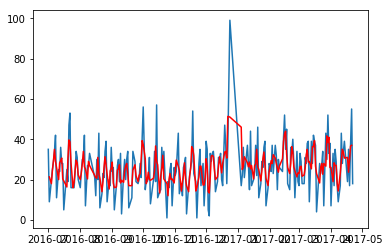

In [123]:
air_visit_group = avd_df.groupby(['air_store_id', 'visit_date'], as_index=False).sum()
test_id = air_visit_group['air_store_id'].unique()[0]

test_visit = air_visit_group[air_visit_group['air_store_id'] == test_id]
test_visit_visitors = np.array(test_visit['visitors'].values, dtype=float)
test_visit_date = test_visit['visit_date'].values

test_df = pd.DataFrame(test_visit_visitors, index=test_visit_date)
test_decomp = seasonal_decompose(test_df, freq=3)
test_trend = test_decomp.trend
plt.plot(test_df)
plt.plot(test_trend, color='red')
plt.show()

In [ ]:
test_trend.values

In [ ]:
def air_visit_trend(store_id, visit_group):
    store_visit = visit_group[visit_group['air_store_id'] == store_id]
    store_visit_visitors = np.array(store_visit['visitors'].values, dtype=float)
    store_visit_date = store_visit['visit_date'].values
    
    store_df = pd.DataFrame(store_visit_visitors, index=store_visit_date)
    decomp = seasonal_decompose(store_df, freq=3)
    trend = decomp.trend
    return trend

In [ ]:
air_visit_group = avd_df.groupby(['air_store_id', 'visit_date'], as_index=False).sum()
trend_array = np.array([])
for store_id in air_visit_group['air_store_id'].unique():
    trend = air_visit_trend(store_id, air_visit_group)
    trend_array = np.append(trend_array, trend)

In [ ]:
trend_array.size

In [114]:
ar_df.drop('visit_datetime', axis=1, inplace=True)

In [122]:
hr_df.groupby(['hpg_store_id', 'reserve_datetime'], as_index=False).sum()

,hpg_store_id,reserve_datetime,reserve_visitors
0,hpg_001112ef76b9802c,2016-02-09 13:00:00,9
1,hpg_001112ef76b9802c,2016-03-03 19:00:00,3
2,hpg_001112ef76b9802c,2016-03-25 19:00:00,5
3,hpg_001112ef76b9802c,2016-04-01 10:00:00,13
4,hpg_001112ef76b9802c,2016-04-15 12:00:00,9
5,hpg_001112ef76b9802c,2016-06-24 13:00:00,9
6,hpg_001112ef76b9802c,2016-06-29 16:00:00,3
7,hpg_001112ef76b9802c,2016-07-08 14:00:00,5
8,hpg_001112ef76b9802c,2016-08-01 15:00:00,3
9,hpg_001112ef76b9802c,2016-08-20 12:00:00,6
